# 410821305_機器學習演算法之參數調整測試

<hr/>

### 目次
- iris Logistic Regression
- iris Random Forest
- iris SVM
- iris KNN
- iris GaussianNB
- iris MultinomialNB

<hr/>

### iris Logistic Regression
- 選用更改<span style="color: red;">penalty</span>以及<span style="color: red;">solver</span>參數來觀察
- 列出所有排列組合：
    - l1: liblinear, saga
    - l2: newton-cg, lbfgs, sag, saga
    - elasticnet: saga
    - none: newton-cg, lbfgs, sag

### 結論
藉由output圖形可以得知：<span style="color: red;">除了l1、liblinear組合之外，其餘方式都有達到100% accuracy。</span>  

<hr/>

#### 以下為使用Logistic Regression演算法測試之程式碼

penalty: l1 / solver: liblinear
accuracy: 91.11%


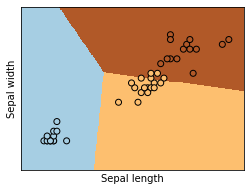

penalty: l1 / solver: saga
accuracy: 100.0%


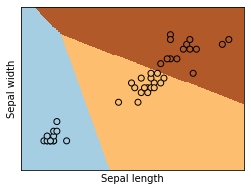

penalty: l2 / solver: newton-cg
accuracy: 100.0%


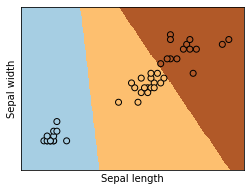

penalty: l2 / solver: lbfgs
accuracy: 100.0%


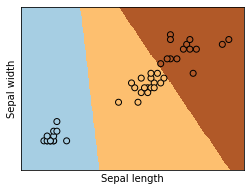

penalty: l2 / solver: sag
accuracy: 100.0%


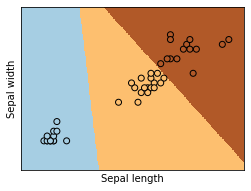

penalty: l2 / solver: saga
accuracy: 100.0%


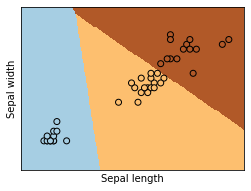

penalty: elasticnet / solver: saga
accuracy: 100.0%


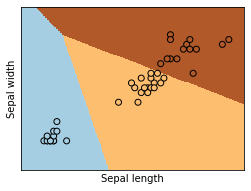

penalty: none / solver: newton-cg
accuracy: 100.0%


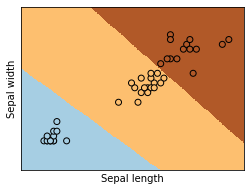

penalty: none / solver: lbfgs
accuracy: 100.0%


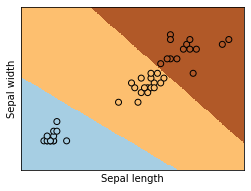

penalty: none / solver: sag
accuracy: 100.0%


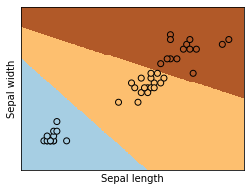

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

# load data, in this case iris
iris = datasets.load_iris()
X = iris.data[:, 2:4]
Y = iris.target

# list out all the penalty and solver permutations
penaltyList = ['l1', 'l2', 'elasticnet', 'none']
solverList = [
    ['liblinear', 'saga'],
    ['newton-cg', 'lbfgs', 'sag', 'saga'],
    ['saga'],
    ['newton-cg', 'lbfgs', 'sag']
]

for i in range(len(penaltyList)):
    for j in range(len(solverList)):
        if(i == j):
            for s in solverList[j]:
                # create Logistic Regression Classifier
                logreg = LogisticRegression(penalty = penaltyList[i], solver = s, l1_ratio = 1)

                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
                
                # train
                logreg.fit(X_train, y_train)

                # axis
                x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
                y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
                h = .02
                xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

                # do the prediction
                Z = logreg.predict(np.c_[xx.ravel(),yy.ravel()])
                accuracy = logreg.score(X_test, y_test)
                print("penalty:", str(penaltyList[i]) + " / solver:", s)
                print("accuracy: " + str(round(accuracy * 100, 2)) + "%")

                # ploting here
                Z = Z.reshape(xx.shape)
                plt.figure(1, figsize = (4, 3))
                plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)
                plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, edgecolors = 'k', cmap = plt.cm.Paired)
                plt.xlabel('Sepal length')
                plt.ylabel('Sepal width')

                plt.xlim(xx.min(),xx.max())
                plt.ylim (yy.min(), yy.max())
                plt.xticks(())
                plt.yticks(())

                plt.show()

### iris Random Forest
- 選用更改<span style="color: red;">n_estimators</span>以及<span style="color: red;">criterion</span>參數來觀察
- 列出所有排列組合：
    - 將n_estimators設為1至501，公差為100
    - criterion採用gini以及entropy
- 直接將運算後之準確率結果以可視化方式印出
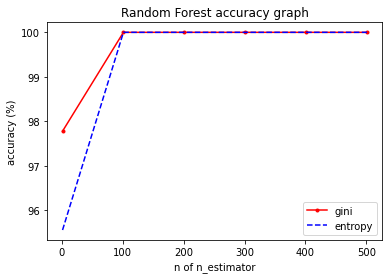

### 結論
藉由使用matplotlib匯出之圖形可以看出：不論<span style="color: red;">使用gini或是entropy這兩種criterion，當n_estimators越大，準確率會越高，甚至達到100% accuracy；不過同時也因為n_estimators變大，因此花費的時間也變多了。</span>  

<hr/>

#### 以下為使用Random Forest演算法測試之程式碼

n_estimators: 1 / criterion: gini
accuracy: 97.78%


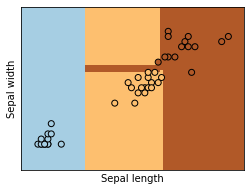

n_estimators: 101 / criterion: gini
accuracy: 100.0%


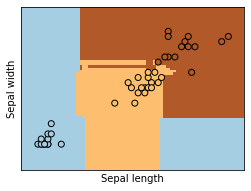

n_estimators: 201 / criterion: gini
accuracy: 100.0%


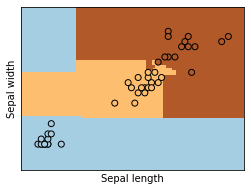

n_estimators: 301 / criterion: gini
accuracy: 100.0%


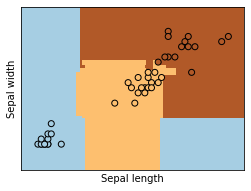

n_estimators: 401 / criterion: gini
accuracy: 100.0%


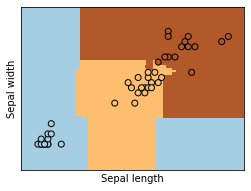

n_estimators: 501 / criterion: gini
accuracy: 100.0%


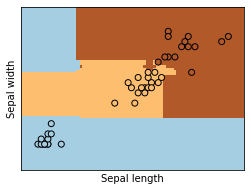

n_estimators: 1 / criterion: entropy
accuracy: 95.56%


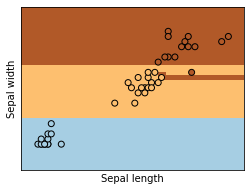

n_estimators: 101 / criterion: entropy
accuracy: 100.0%


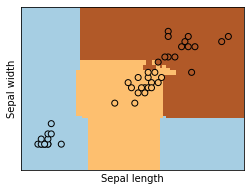

n_estimators: 201 / criterion: entropy
accuracy: 100.0%


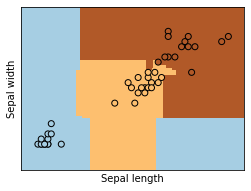

n_estimators: 301 / criterion: entropy
accuracy: 100.0%


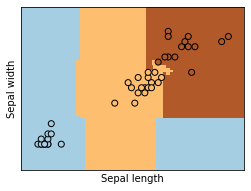

n_estimators: 401 / criterion: entropy
accuracy: 100.0%


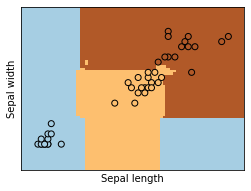

n_estimators: 501 / criterion: entropy
accuracy: 100.0%


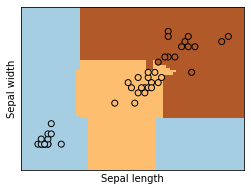

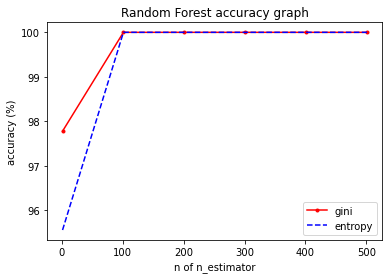

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# load data, in this case iris
iris = datasets.load_iris()
X = iris.data[:, 2:4]
Y = iris.target

n_estimatorsList = [x for x in range(1, 502, 100)]
criterionList = ['gini', 'entropy']
gini_accuracyList = []
entropy_accuracyList = []

for _criterion in criterionList:
    for estimator in n_estimatorsList:
        # x train test and y train test
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
        
        # create RandomoretClasser
        randomForest = RandomForestClassifier(n_estimators = estimator, criterion = _criterion)

        # train
        randomForest.fit(X_train, y_train)
        
        # print the result
        print("n_estimators:", estimator, "/ criterion:", _criterion)
        accuracy = round(randomForest.score(X_test, y_test) * 100, 2)
        print("accuracy: " + str(accuracy) + "%")
        gini_accuracyList.append(accuracy) if(_criterion == 'gini') else entropy_accuracyList.append(accuracy)
        
        # axis
        x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
        y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
        h = .02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # do the prediction
        Z = randomForest.predict(np.c_[xx.ravel(),yy.ravel()])

        # ploting here
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize = (4,3))
        plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, edgecolors = 'k', cmap = plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()

plt.title('Random Forest accuracy graph')
plt.plot(n_estimatorsList, gini_accuracyList, 'r.-', label = 'gini')
plt.plot(n_estimatorsList, entropy_accuracyList, 'b--', label = 'entropy')
plt.xlabel('n of n_estimator')
plt.ylabel('accuracy (%)')
plt.legend()
plt.show()

### iris SVM
- 選用更改<span style="color: red;">kernel</span>以及<span style="color: red;">decision_function_shape</span>參數來觀察
- 列出所有排列組合：
    - kernel採用linear, poly, rbf(default)
    - decision_function_shape採用ovo, ovr
- 直接將運算後之準確率結果以可視化方式印出
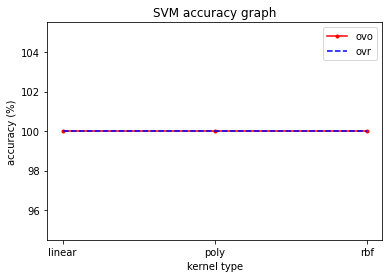

### 結論
<span style="color: red;">不論使用何種排列方式，SVM都可以得到100% accuracy。</span>  

<hr/>

#### 以下為使用SVM演算法測試之程式碼

kernel: linear / decision_function_shape: ovo
accuracy: 100.0%


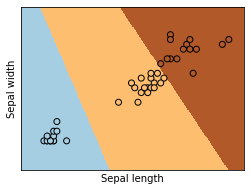

kernel: poly / decision_function_shape: ovo
accuracy: 100.0%


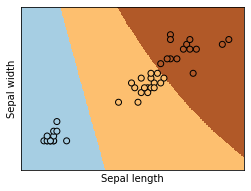

kernel: rbf / decision_function_shape: ovo
accuracy: 100.0%


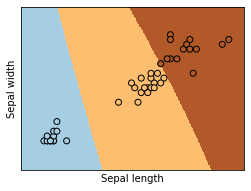

kernel: linear / decision_function_shape: ovr
accuracy: 100.0%


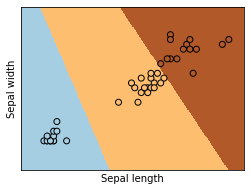

kernel: poly / decision_function_shape: ovr
accuracy: 100.0%


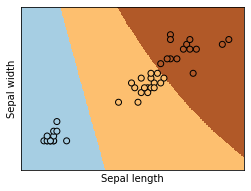

kernel: rbf / decision_function_shape: ovr
accuracy: 100.0%


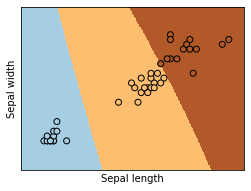

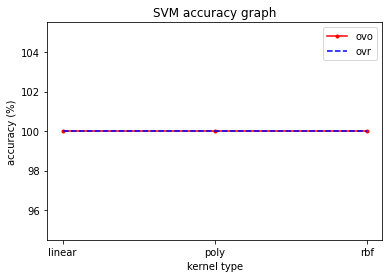

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

# load data, in this case iris
iris = datasets.load_iris()
X = iris.data[:, 2:]
Y = iris.target

kernelList = ['linear', 'poly', 'rbf']
decision_function_shapeList = ['ovo', 'ovr']
ovo_accuracyList = []
ovr_accuracyList = []

for dfs in decision_function_shapeList:
    for k in kernelList:
        # create Support Vector Machine Classifier
        svc = SVC(decision_function_shape = dfs, kernel = k)

        # train
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)
        svc.fit(X_train, y_train)

        # draw axis
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = .02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # prediction
        Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

        # print situation and its accuracy
        print("kernel: " + k + " / decision_function_shape: " + dfs)
        accuracy = round(svc.score(X_test, y_test) * 100, 2)
        print("accuracy: " + str(accuracy) + "%")
        ovo_accuracyList.append(accuracy) if dfs == 'ovo' else ovr_accuracyList.append(accuracy)
        
        # plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize = (4, 3))
        plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, edgecolors = 'k', cmap = plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())

        plt.show()
        
plt.title('SVM accuracy graph')
plt.plot(kernelList, ovo_accuracyList, 'r.-', label = 'ovo')
plt.plot(kernelList, ovr_accuracyList, 'b--', label = 'ovr')
plt.xlabel('kernel type')
plt.ylabel('accuracy (%)')
plt.legend()
plt.show()

### iris KNN
- 選用更改<span style="color: red;">p</span>以及<span style="color: red;">n_neightbors</span>參數來觀察
- 列出所有排列組合：
    - p: 1, 2
    - n_neightbors: 3 to 101, 公差 = 2（避開偶數）
- 直接將運算後之準確率結果以可視化方式印出
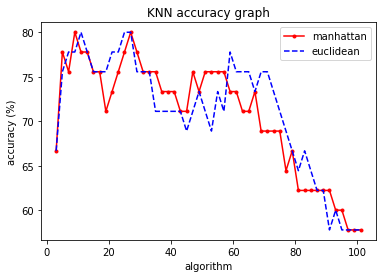

### 結論
將所有可能性利用matplotlib印出來之後，<span style="color: red;">可以發現不論採用何種計算距離之方式：當n_neighbors數量越來越大，將會出現轉確率降低以及逐漸轉變為二分法之現象。</span>  

<hr/>

#### 以下為使用KNN演算法測試之程式碼

p: 1 / n_neighbors: 3
accuracy: 66.67%


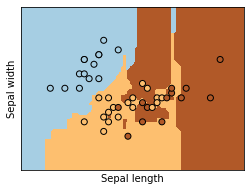

p: 2 / n_neighbors: 3
accuracy: 66.67%


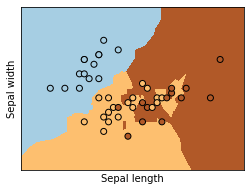

p: 1 / n_neighbors: 5
accuracy: 77.78%


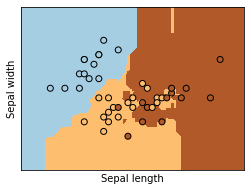

p: 2 / n_neighbors: 5
accuracy: 75.56%


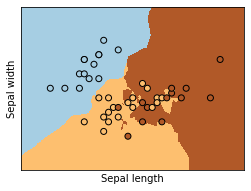

p: 1 / n_neighbors: 7
accuracy: 75.56%


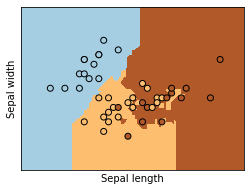

p: 2 / n_neighbors: 7
accuracy: 77.78%


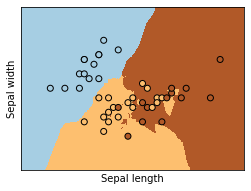

p: 1 / n_neighbors: 9
accuracy: 80.0%


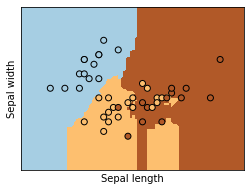

p: 2 / n_neighbors: 9
accuracy: 77.78%


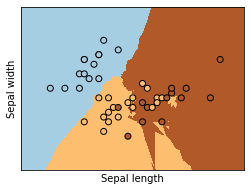

p: 1 / n_neighbors: 11
accuracy: 77.78%


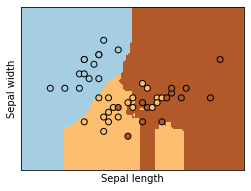

p: 2 / n_neighbors: 11
accuracy: 80.0%


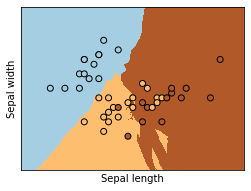

p: 1 / n_neighbors: 13
accuracy: 77.78%


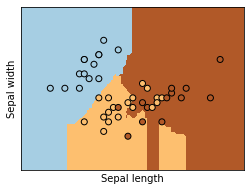

p: 2 / n_neighbors: 13
accuracy: 77.78%


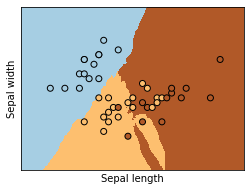

p: 1 / n_neighbors: 15
accuracy: 75.56%


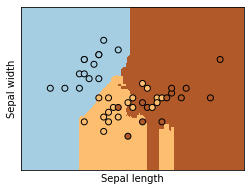

p: 2 / n_neighbors: 15
accuracy: 75.56%


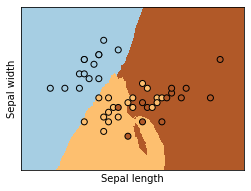

p: 1 / n_neighbors: 17
accuracy: 75.56%


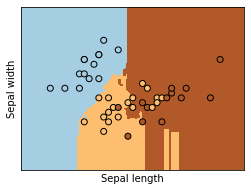

p: 2 / n_neighbors: 17
accuracy: 75.56%


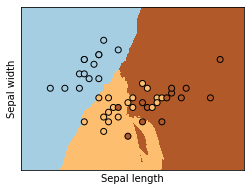

p: 1 / n_neighbors: 19
accuracy: 71.11%


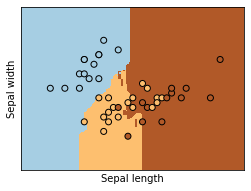

p: 2 / n_neighbors: 19
accuracy: 75.56%


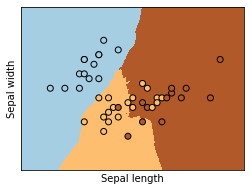

p: 1 / n_neighbors: 21
accuracy: 73.33%


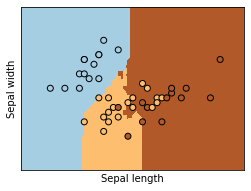

p: 2 / n_neighbors: 21
accuracy: 77.78%


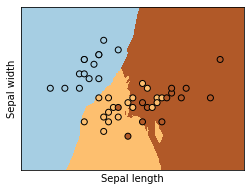

p: 1 / n_neighbors: 23
accuracy: 75.56%


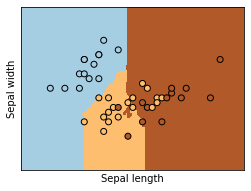

p: 2 / n_neighbors: 23
accuracy: 77.78%


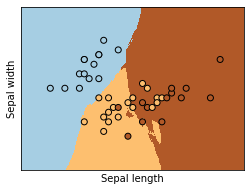

p: 1 / n_neighbors: 25
accuracy: 77.78%


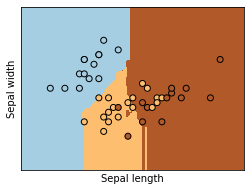

p: 2 / n_neighbors: 25
accuracy: 80.0%


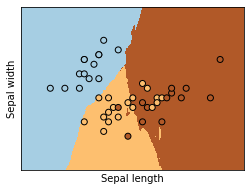

p: 1 / n_neighbors: 27
accuracy: 80.0%


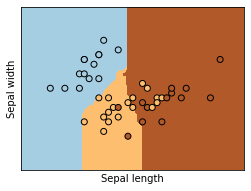

p: 2 / n_neighbors: 27
accuracy: 80.0%


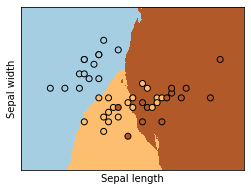

p: 1 / n_neighbors: 29
accuracy: 77.78%


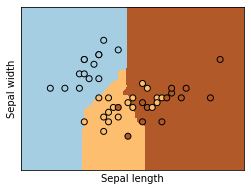

p: 2 / n_neighbors: 29
accuracy: 75.56%


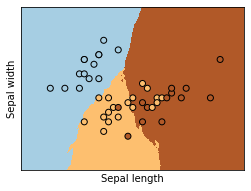

p: 1 / n_neighbors: 31
accuracy: 75.56%


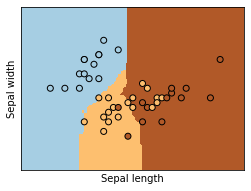

p: 2 / n_neighbors: 31
accuracy: 75.56%


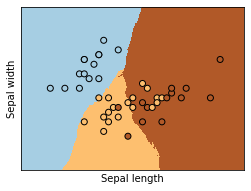

p: 1 / n_neighbors: 33
accuracy: 75.56%


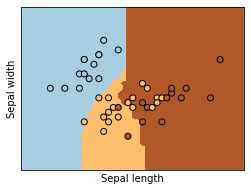

p: 2 / n_neighbors: 33
accuracy: 75.56%


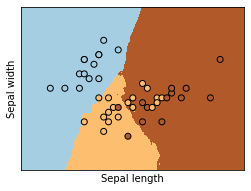

p: 1 / n_neighbors: 35
accuracy: 75.56%


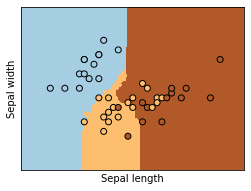

p: 2 / n_neighbors: 35
accuracy: 71.11%


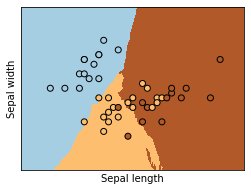

p: 1 / n_neighbors: 37
accuracy: 73.33%


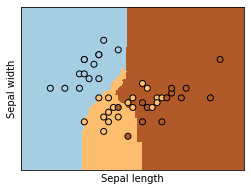

p: 2 / n_neighbors: 37
accuracy: 71.11%


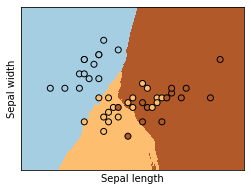

p: 1 / n_neighbors: 39
accuracy: 73.33%


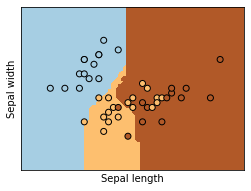

p: 2 / n_neighbors: 39
accuracy: 71.11%


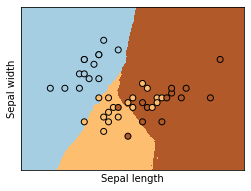

p: 1 / n_neighbors: 41
accuracy: 73.33%


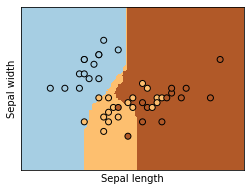

p: 2 / n_neighbors: 41
accuracy: 71.11%


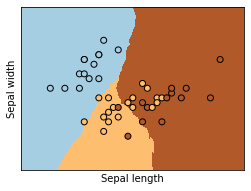

p: 1 / n_neighbors: 43
accuracy: 71.11%


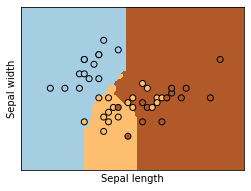

p: 2 / n_neighbors: 43
accuracy: 71.11%


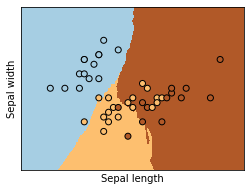

p: 1 / n_neighbors: 45
accuracy: 71.11%


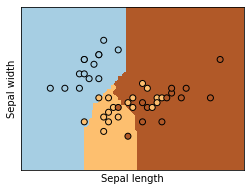

p: 2 / n_neighbors: 45
accuracy: 68.89%


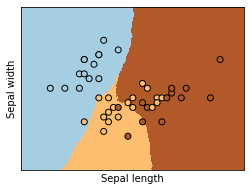

p: 1 / n_neighbors: 47
accuracy: 75.56%


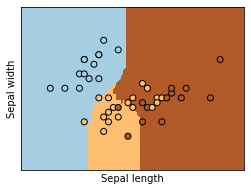

p: 2 / n_neighbors: 47
accuracy: 71.11%


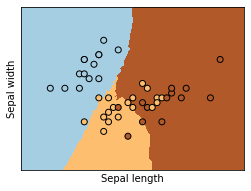

p: 1 / n_neighbors: 49
accuracy: 73.33%


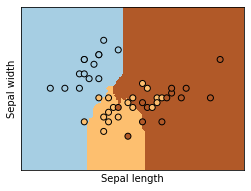

p: 2 / n_neighbors: 49
accuracy: 73.33%


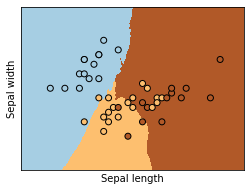

p: 1 / n_neighbors: 51
accuracy: 75.56%


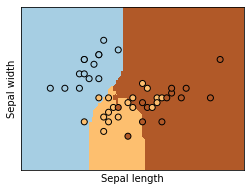

p: 2 / n_neighbors: 51
accuracy: 71.11%


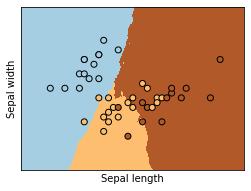

p: 1 / n_neighbors: 53
accuracy: 75.56%


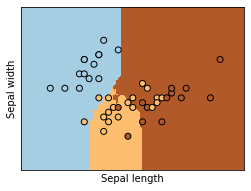

p: 2 / n_neighbors: 53
accuracy: 68.89%


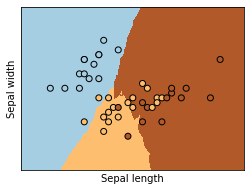

p: 1 / n_neighbors: 55
accuracy: 75.56%


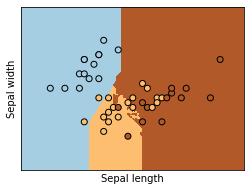

p: 2 / n_neighbors: 55
accuracy: 73.33%


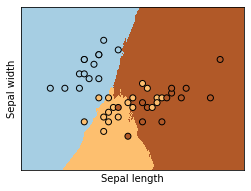

p: 1 / n_neighbors: 57
accuracy: 75.56%


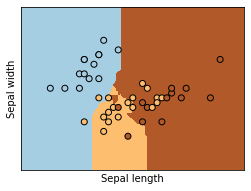

p: 2 / n_neighbors: 57
accuracy: 71.11%


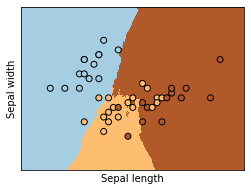

p: 1 / n_neighbors: 59
accuracy: 73.33%


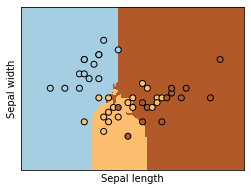

p: 2 / n_neighbors: 59
accuracy: 77.78%


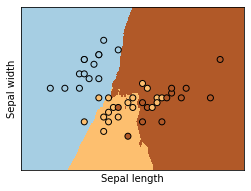

p: 1 / n_neighbors: 61
accuracy: 73.33%


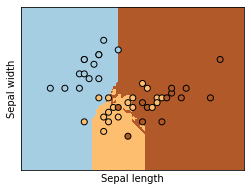

p: 2 / n_neighbors: 61
accuracy: 75.56%


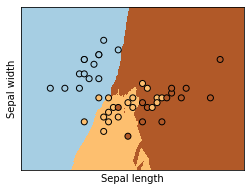

p: 1 / n_neighbors: 63
accuracy: 71.11%


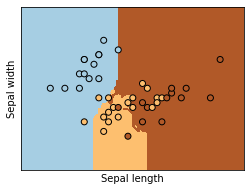

p: 2 / n_neighbors: 63
accuracy: 75.56%


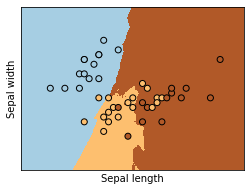

p: 1 / n_neighbors: 65
accuracy: 71.11%


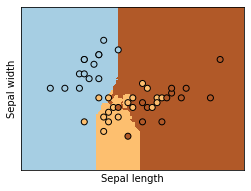

p: 2 / n_neighbors: 65
accuracy: 75.56%


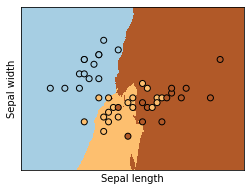

p: 1 / n_neighbors: 67
accuracy: 73.33%


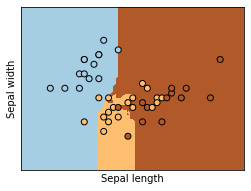

p: 2 / n_neighbors: 67
accuracy: 73.33%


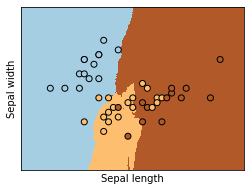

p: 1 / n_neighbors: 69
accuracy: 68.89%


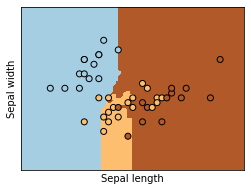

p: 2 / n_neighbors: 69
accuracy: 75.56%


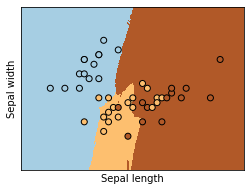

p: 1 / n_neighbors: 71
accuracy: 68.89%


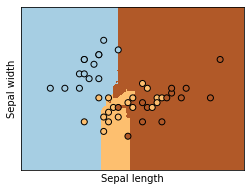

p: 2 / n_neighbors: 71
accuracy: 75.56%


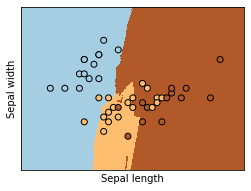

p: 1 / n_neighbors: 73
accuracy: 68.89%


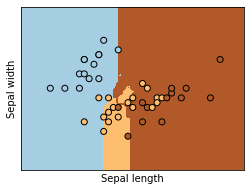

p: 2 / n_neighbors: 73
accuracy: 73.33%


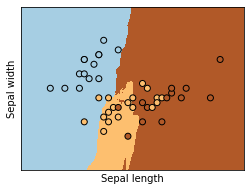

p: 1 / n_neighbors: 75
accuracy: 68.89%


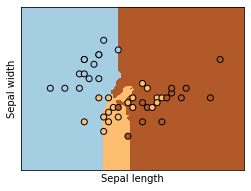

p: 2 / n_neighbors: 75
accuracy: 71.11%


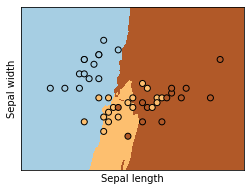

p: 1 / n_neighbors: 77
accuracy: 64.44%


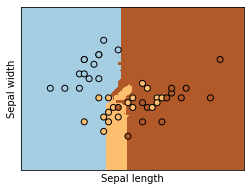

p: 2 / n_neighbors: 77
accuracy: 68.89%


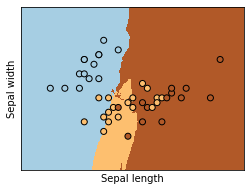

p: 1 / n_neighbors: 79
accuracy: 66.67%


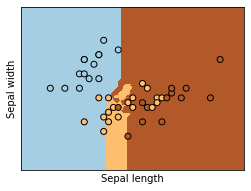

p: 2 / n_neighbors: 79
accuracy: 66.67%


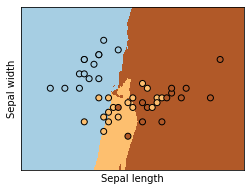

p: 1 / n_neighbors: 81
accuracy: 62.22%


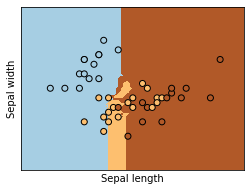

p: 2 / n_neighbors: 81
accuracy: 64.44%


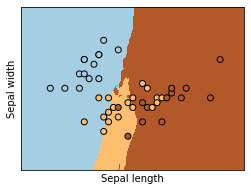

p: 1 / n_neighbors: 83
accuracy: 62.22%


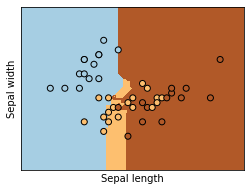

p: 2 / n_neighbors: 83
accuracy: 66.67%


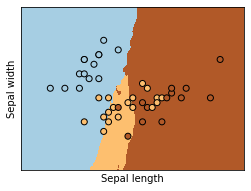

p: 1 / n_neighbors: 85
accuracy: 62.22%


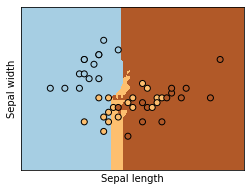

p: 2 / n_neighbors: 85
accuracy: 64.44%


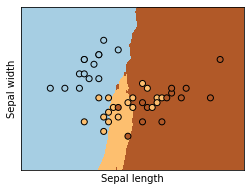

p: 1 / n_neighbors: 87
accuracy: 62.22%


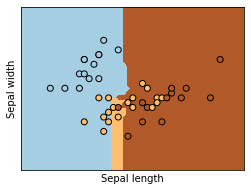

p: 2 / n_neighbors: 87
accuracy: 62.22%


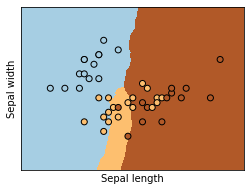

p: 1 / n_neighbors: 89
accuracy: 62.22%


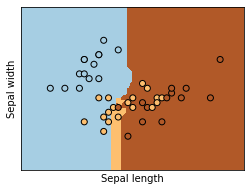

p: 2 / n_neighbors: 89
accuracy: 62.22%


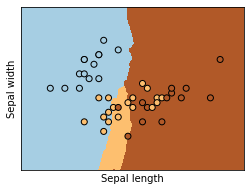

p: 1 / n_neighbors: 91
accuracy: 62.22%


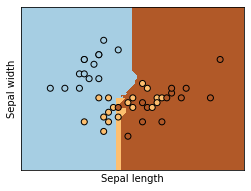

p: 2 / n_neighbors: 91
accuracy: 57.78%


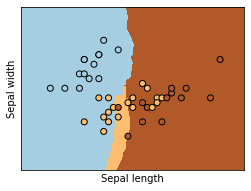

p: 1 / n_neighbors: 93
accuracy: 60.0%


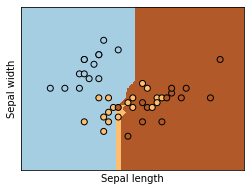

p: 2 / n_neighbors: 93
accuracy: 60.0%


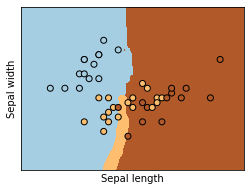

p: 1 / n_neighbors: 95
accuracy: 60.0%


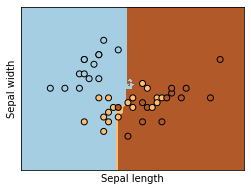

p: 2 / n_neighbors: 95
accuracy: 57.78%


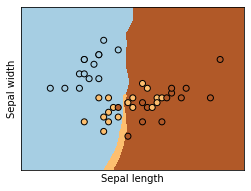

p: 1 / n_neighbors: 97
accuracy: 57.78%


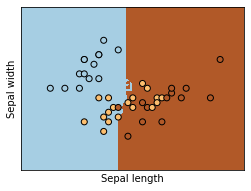

p: 2 / n_neighbors: 97
accuracy: 57.78%


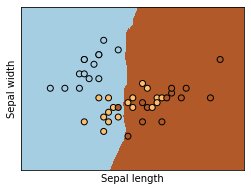

p: 1 / n_neighbors: 99
accuracy: 57.78%


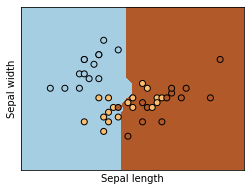

p: 2 / n_neighbors: 99
accuracy: 57.78%


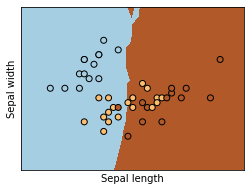

p: 1 / n_neighbors: 101
accuracy: 57.78%


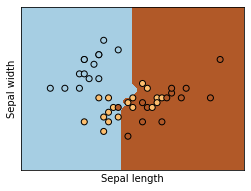

p: 2 / n_neighbors: 101
accuracy: 57.78%


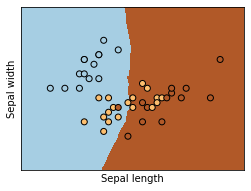

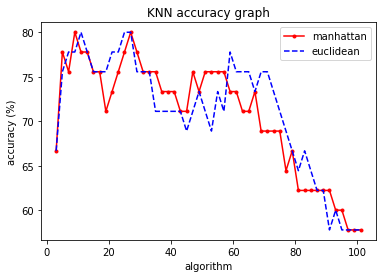

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

# load data, in this case iris
iris = datasets.load_iris()
X = iris.data[:, 0:2]
Y = iris.target

n_neighborsList = [x for x in range(3, 102, 2)]
pList = [1, 2]
manhattan_accuracyList = []
euclidean_accuracyList = []

for n in n_neighborsList:
    for _p in pList:
        # create k-nearest neighbors
        knn = KNeighborsClassifier(n_neighbors = n, p = _p)
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
        # train
        knn.fit(X_train, y_train)
        
        # print situation and its accuracy
        print("p: " + str(_p) + " / n_neighbors: " + str(n))
        accuracy = round(knn.score(X_test, y_test) * 100, 2)
        print("accuracy: " + str(accuracy) + "%")
        manhattan_accuracyList.append(accuracy) if _p == 1 else euclidean_accuracyList.append(accuracy)

        # axis
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = .02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # prediction
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

        # plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize = (4, 3))
        plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, edgecolors = 'k', cmap = plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())

        plt.show()
        
plt.title('KNN accuracy graph')
plt.plot(n_neighborsList, manhattan_accuracyList, 'r.-', label = 'manhattan')
plt.plot(n_neighborsList, euclidean_accuracyList, 'b--', label = 'euclidean')
plt.xlabel('algorithm')
plt.ylabel('accuracy (%)')
plt.legend()
plt.show()

### iris GaussianNB
- 選用更改<span style="color: red;">var_smoothing</span>以及<span style="color: red;">priors</span>參數來觀察
- 列出排列組合：
    - var_smoothing: 1e-9, 1e-3, 1, 10
    - priors: [0.33, 0.33, 0.33], [0.2, 0.4, 0.4], [0.1, 0.45, 0.45]

### 結論
藉由印出圖片可以得知：<span style="color: red;">當priors平均以及var_smoothings較小時，準確率較高。如果priors不平均或是var_smoothing過大，會造成準確率下降。</span>  

<hr/>

#### 以下為使用GaussianNB演算法測試之程式碼

var_smoothing: 1e-09 / priors: [[0.3333333333333333], [0.3333333333333333], [0.3333333333333333]]
accuracy: 100.0%


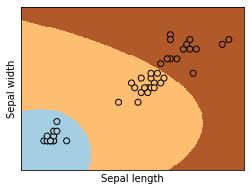

var_smoothing: 0.001 / priors: [[0.3333333333333333], [0.3333333333333333], [0.3333333333333333]]
accuracy: 100.0%


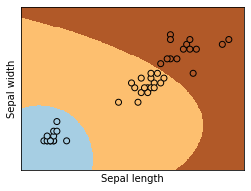

var_smoothing: 1 / priors: [[0.3333333333333333], [0.3333333333333333], [0.3333333333333333]]
accuracy: 97.78%


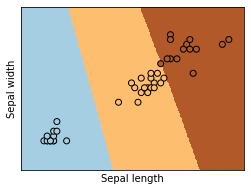

var_smoothing: 10 / priors: [[0.3333333333333333], [0.3333333333333333], [0.3333333333333333]]
accuracy: 97.78%


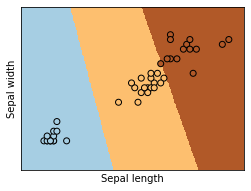

var_smoothing: 1e-09 / priors: [[0.2], [0.4], [0.4]]
accuracy: 100.0%


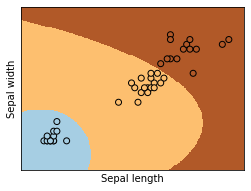

var_smoothing: 0.001 / priors: [[0.2], [0.4], [0.4]]
accuracy: 100.0%


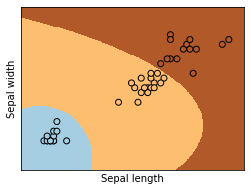

var_smoothing: 1 / priors: [[0.2], [0.4], [0.4]]
accuracy: 97.78%


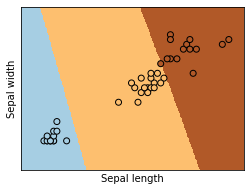

var_smoothing: 10 / priors: [[0.2], [0.4], [0.4]]
accuracy: 66.67%


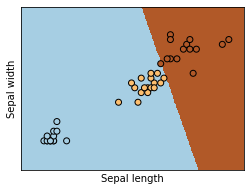

var_smoothing: 1e-09 / priors: [[0.1], [0.45], [0.45]]
accuracy: 100.0%


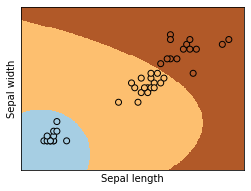

var_smoothing: 0.001 / priors: [[0.1], [0.45], [0.45]]
accuracy: 100.0%


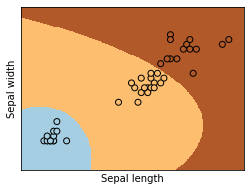

var_smoothing: 1 / priors: [[0.1], [0.45], [0.45]]
accuracy: 68.89%


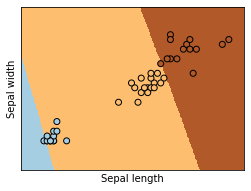

var_smoothing: 10 / priors: [[0.1], [0.45], [0.45]]
accuracy: 66.67%


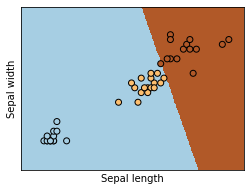

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

# load data, in this case iris
iris = datasets.load_iris()
X = iris.data[:, 2:]
Y = iris.target

smoothingList = [1e-9, 1e-3, 1, 10]
priorsList = [
    [[1/3], [1/3], [1/3]], 
    [[0.2], [0.4], [0.4]],
    [[0.1], [0.45], [0.45]]
]

for p in priorsList:
    for smoothing in smoothingList:
        # create Gussia Naive Bayes
        gaussianNB = GaussianNB(var_smoothing = smoothing, priors = p)

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

        # training
        gaussianNB.fit(X_train, y_train)

        # axis
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = .02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # prediction
        Z = gaussianNB.predict(np.c_[xx.ravel(), yy.ravel()])

        # print informations and accuracy
        print("var_smoothing: " + str(smoothing) + " / priors: " + str(p))
        print("accuracy: " + str(round(gaussianNB.score(X_test, y_test) * 100, 2)) + "%")

        # plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize = (4, 3))
        plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, edgecolors = 'k', cmap = plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())

        plt.show()

### iris MultinomialNB
- 選用更改<span style="color: red;">alpha</span>以及<span style="color: red;">fit_prior</span>參數來觀察
- 列出排列組合：
    - alpha: 0, 1, 2, 3, 4, 5
    - fit_prior: true, false
- 直接將運算後之準確率結果以可視化方式印出
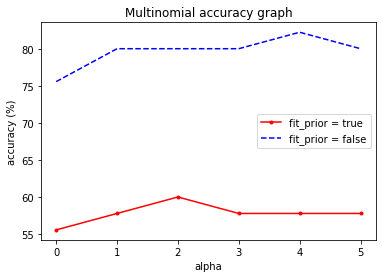

### 結論
在MultinomialNB中以及根據其圖表觀察結果，可以得知：對於任何測試中的alpha而言，fit_prior = False的準確率會高於fit_prior = True。<span style="color: red;">且因為MultinomialNB適合離散方面的資料，因此對於其他機器學習演算法而言，MultinomialNB之準確率較低。</span>  

<hr/>

#### 以下為使用MultinomialNB演算法測試之程式碼

alpha: 0 / fit_prior: True
accuracy: 55.56%


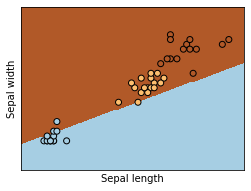

alpha: 0 / fit_prior: False
accuracy: 75.56%


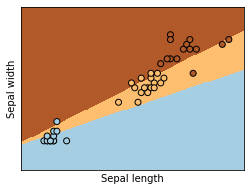

alpha: 1 / fit_prior: True
accuracy: 57.78%


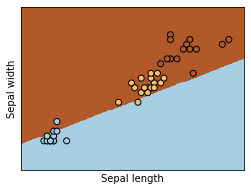

alpha: 1 / fit_prior: False
accuracy: 80.0%


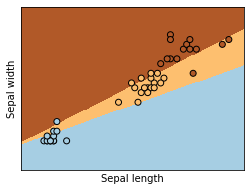

alpha: 2 / fit_prior: True
accuracy: 60.0%


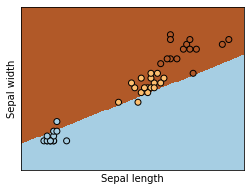

alpha: 2 / fit_prior: False
accuracy: 80.0%


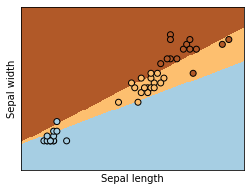

alpha: 3 / fit_prior: True
accuracy: 57.78%


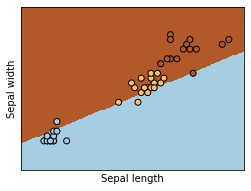

alpha: 3 / fit_prior: False
accuracy: 80.0%


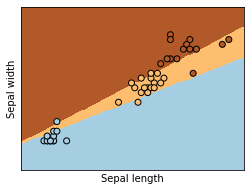

alpha: 4 / fit_prior: True
accuracy: 57.78%


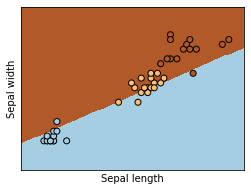

alpha: 4 / fit_prior: False
accuracy: 82.22%


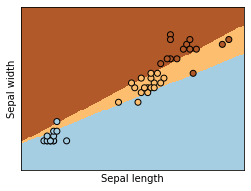

alpha: 5 / fit_prior: True
accuracy: 57.78%


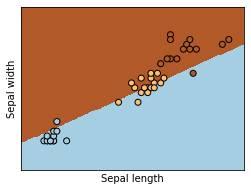

alpha: 5 / fit_prior: False
accuracy: 80.0%


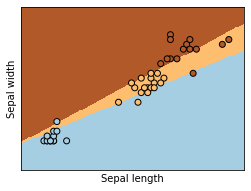

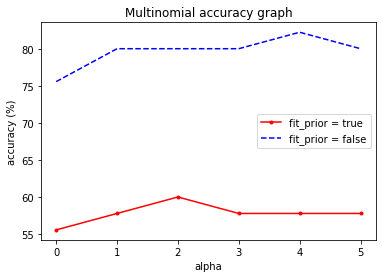

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

# load data, in this case iris
iris = datasets.load_iris()
X = iris.data[:, 2:]
Y = iris.target

alphaList = [0, 1, 2, 3, 4, 5]
priorsList = [True, False]
priorTrueList = []
priorFalseList = []

for a in alphaList:
    for p in priorsList:
        # create Gussia Naive Bayes
        multinomialNB = MultinomialNB(alpha = a, fit_prior = p)

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

        # training
        multinomialNB.fit(X_train, y_train)

        # axis
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = .02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # prediction
        Z = multinomialNB.predict(np.c_[xx.ravel(), yy.ravel()])

        # print informations and accuracy
        print("alpha: " + str(a) + " / fit_prior: " + str(p))
        accuracy = round(multinomialNB.score(X_test, y_test) * 100, 2)
        print("accuracy: " + str(accuracy) + "%")
        priorTrueList.append(accuracy) if p == True else priorFalseList.append(accuracy)

        # plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize = (4, 3))
        plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired)

        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, edgecolors = 'k', cmap = plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())

        plt.show()
        
plt.title('Multinomial accuracy graph')
plt.plot(alphaList, priorTrueList, 'r.-', label = 'fit_prior = true')
plt.plot(alphaList, priorFalseList, 'b--', label = 'fit_prior = false')
plt.xlabel('alpha')
plt.ylabel('accuracy (%)')
plt.legend()
plt.show()